# Experiment (1) Baseline model

## Configurations

In [1]:
import mlflow
import os

# Set DagsHub credentials (you'll need to set these environment variables)
os.environ['MLFLOW_TRACKING_USERNAME'] = 'yahiaehab10'  # Replace with your DagsHub username
os.environ["MLFLOW_TRACKING_PASSWORD"] = (
    "b1e53999e80aecdcf2b9a9e6d0e2fea6ae02fa4c"  # Replace with your DagsHub token
)

# Set the correct MLflow tracking URI for DagsHub
mlflow.set_tracking_uri(
    "https://dagshub.com/yahiaehab10/end-to-end-sentiment-analysis.mlflow"
)

# Set experiment name
mlflow.set_experiment("baseline-model")

with mlflow.start_run():
    mlflow.log_param("param1", 1)
    mlflow.log_metric("metric1", 0.1)

🏃 View run efficient-crab-977 at: https://dagshub.com/yahiaehab10/end-to-end-sentiment-analysis.mlflow/#/experiments/0/runs/31808981842949fabb4639342e7ac68a
🧪 View experiment at: https://dagshub.com/yahiaehab10/end-to-end-sentiment-analysis.mlflow/#/experiments/0


## Preprocessing

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv"
)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df = df[df["clean_comment"].str.strip() != '']

df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def process_comment(comment):
    # Convert to lowercase
    comment = comment.lower()
    # Remove trailing and leading whitespace
    comment = comment.strip()
    # Remove newline characters
    comment = comment.replace('\n', ' ').replace('\r', ' ')
    # Remove non-alphanumeric characters (except spaces)
    comment = re.sub(r'[^a-z0-9\s]', '', comment)
    # Remove stopwords but retain important ones for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'no', 'not', 'nor', "don't", "didn't", "won't", "wouldn't", "couldn't", "shouldn't"}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])
    return comment

df['clean_comment'] = df['clean_comment'].apply(process_comment)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yahiaehab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yahiaehab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


## Create baseline model

In [7]:
import pandas

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedGroupKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

### Vectorizing the comments using Bag of Words (CountVectorizer)

In [ ]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['clean_comment']).toarray()
y = df['category'].values

In [13]:
X[:5], y[:5]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([ 1,  1, -1,  0,  1]))

Accuracy: 0.6497


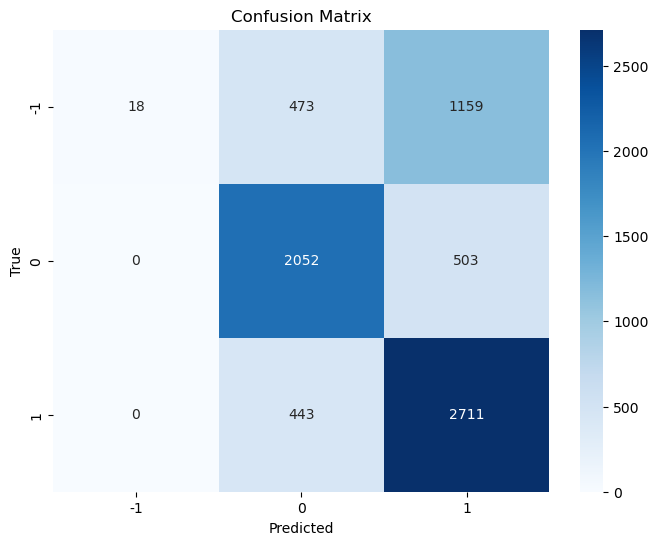

2025/09/19 17:03:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Baseline_TrainTestSplit at: https://dagshub.com/yahiaehab10/end-to-end-sentiment-analysis.mlflow/#/experiments/0/runs/8cd65b448b2848a2bc596e6dbb716340
🧪 View experiment at: https://dagshub.com/yahiaehab10/end-to-end-sentiment-analysis.mlflow/#/experiments/0
Accuracy: 0.6497
Model training and logging completed.


In [14]:
# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Define and train the Random Forest baseline model
with mlflow.start_run():
    # Logging Description and Tags
    mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")
    mlflow.set_tag("description", "Random Forest baseline model with train-test split")

    # Log params for the vectorizer
    mlflow.log_param("vectorizer", "CountVectorizer")
    mlflow.log_param("max_features", vectorizer.max_features)

    # Log RandomForest params
    n_estimators = 200
    max_depth = 15
    random_state = 42

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("random_state", random_state)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    print(f"Accuracy: {accuracy:.4f}")

    classification = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in classification.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Confusion Matrix plot
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    plt.show()

    # Log the confusion matrix as an artifact
    mlflow.log_artifact("confusion_matrix.png")
    os.remove("confusion_matrix.png")

    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Log dataset as an artifact
    df.to_csv("processed_reddit_data.csv", index=False)
    mlflow.log_artifact("processed_reddit_data.csv")

    # Log data version
    mlflow.set_tag("data_version", "v1.0")

print (f"Accuracy: {accuracy:.4f}")
print("Model training and logging completed.")

##